In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_excel("Rice Dataset.xlsx")

In [4]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.3+ KB


In [8]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [1]:
plt.figure(figsize=(15,12))
plt.subplot(2, 4, 1)
sns.histplot(df, x="Area",hue="Class", kde=True)
plt.title("Area")

plt.subplot(2, 4, 2)
sns.histplot(df, x="Perimeter",hue="Class", kde=True)
plt.title("Perimeter")

plt.subplot(2, 4, 3)
sns.histplot(df, x="Major_Axis_Length",hue="Class", kde=True)
plt.title("Major_Axis_Length")

plt.subplot(2, 4, 4)
sns.histplot(df, x="Minor_Axis_Length",hue="Class", kde=True)
plt.title("Minor_Axis_Length")

plt.subplot(2, 4, 5)
sns.histplot(df, x="Eccentricity",hue="Class", kde=True)
plt.title("Eccentricity")

plt.subplot(2, 4, 6)
sns.histplot(df, x="Convex_Area",hue="Class", kde=True)
plt.title("Convex_Area")

plt.subplot(2, 4, 7)
sns.histplot(df, x="Extent",hue="Class", kde=True)
plt.title("Extent")

plt.show()

NameError: name 'plt' is not defined

## FIndings
#### Area, Perimeter, Major Axis Length, Eccentricity and Covex area parimeters are showing significant difference in data of cammeo and osmancik rice
#### Minor Axis Length and Extent parimeters needs to be checked by hypothesis testing for their independence.

In [17]:
df.groupby(["Class"])[df.columns[:-1]].mean()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
Class,,,,,,,
Cammeo,14162.892025,487.438942,205.478589,88.767532,0.901047,14494.426994,0.651420
Osmancik,11549.783486,429.415505,176.287755,84.479042,0.876271,11799.585780,0.669796


In [20]:
cam_area_sample= df[df["Class"]=="Cammeo"]["Area"].sample(40)
osm_area_sample= df[df["Class"]=="Osmancik"]["Area"].sample(40)

In [21]:
cam_area_sample

1159    15105
140     14159
118     14138
406     14862
417     13080
365     14758
603     15301
591     13970
1107    15809
468     12801
692     14713
882     11975
336     15725
1265    14057
938     14935
38      14524
1594    14419
1187    14470
790     13814
359     15074
710     14928
1442    13091
403     16155
45      13148
14      13500
1105    11161
490     14060
473     12149
611     13789
1342    13900
1486    13918
213     16011
133     13507
350     14363
974     13437
30      13130
1478    11350
169     14209
1563    12153
67      13737
Name: Area, dtype: int64

In [22]:
osm_area_sample

1807    10765
2556    11476
2970    11115
1681    11413
1838    11440
3209     9878
3020    10074
3507    10847
2575    12898
2863    10680
2758    12784
2608    11646
3104    11810
3071    13683
3591    10398
3526    10192
3337    10312
3809    11434
3215    10662
2411    12120
1831    10756
1737    10650
3222    11889
2336    11396
1665    12408
2654    12418
1741    11168
1731    11928
3424    10193
3773    10949
2326    11334
3379    12911
2835    10427
1972    12231
2074    12274
3508    11012
2419    11410
3035    12228
3363    11898
3607    11881
Name: Area, dtype: int64

In [23]:
h0="There is no significant difference between mean area of Cameo and Osmancik rice"
h1="There is significant difference between between the mean area of Cammeo and Osmancik rice"

In [24]:
stat_val, p_val=ttest_ind(cam_area_sample, osm_area_sample)
stat_val, p_val

(np.float64(10.903718676041473), np.float64(2.384623257730797e-17))

In [25]:
alpha=0.05
if alpha<p_val:
    print("Accept the null hypothesis", h0)
else:
    print("Reject the null hypothesis", h1)

Reject the null hypothesis There is significant difference between between the mean area of Cammeo and Osmancik rice


In [27]:
cam_perimeter_sample= df[df["Class"]=="Cammeo"]["Perimeter"].sample(40)
osm_perimeter_sample= df[df["Class"]=="Osmancik"]["Perimeter"].sample(40)

In [28]:
cam_perimeter_sample

488     479.355011
44      482.579987
261     497.773987
1361    505.276001
733     461.549988
199     513.890991
1318    480.950989
643     479.199005
1373    475.355011
1136    494.256012
1498    449.343994
800     470.415009
368     502.049988
106     483.593994
377     484.276001
1612    490.559998
1230    515.783997
1029    491.059998
447     511.665985
489     505.928009
280     507.785004
286     506.290009
484     495.466003
172     539.776001
1081    487.351013
1389    474.309998
1256    481.976013
30      467.921997
1169    444.800995
135     458.911011
1520    492.545990
1381    466.653015
1427    479.931000
795     437.884003
1415    468.389008
428     480.962006
1371    460.135986
1337    441.774994
961     495.450012
1206    511.022003
Name: Perimeter, dtype: float64

In [29]:
osm_perimeter_sample

2364    383.743988
3012    413.286987
2328    411.589996
3167    415.751007
2327    407.194000
1986    420.794006
2143    451.048004
2291    445.201996
3756    434.877014
1783    445.295013
2234    438.881012
2809    423.701996
2321    447.127991
2522    433.438995
2078    433.294006
3053    433.520996
2851    441.227997
2602    420.022003
3679    436.371002
1700    451.316986
3525    411.384003
2121    420.076996
3433    465.002991
3059    436.140991
3500    438.161987
1869    412.135010
2373    392.239990
3181    408.227997
2623    445.614014
2368    428.166992
3051    472.315002
3737    394.713013
3021    418.082001
1683    453.941010
3636    434.786987
3539    406.402008
2847    412.989014
2530    427.524994
3241    444.622986
3126    431.208008
Name: Perimeter, dtype: float64

In [30]:
h0="There is no significant difference between mean perimeter of Cameo and Osmancik rice"
h1="There is significant difference between between the mean perimeter of Cammeo and Osmancik rice"

In [31]:
stat_val, p_val=ttest_ind(cam_perimeter_sample, osm_perimeter_sample)
stat_val, p_val

(np.float64(11.989122090438086), np.float64(2.236558095149756e-19))

In [32]:
alpha=0.05
if alpha<p_val:
    print("Accept the null hypothesis", h0)
else:
    print("Reject the null hypothesis", h1)

Reject the null hypothesis There is significant difference between between the mean perimeter of Cammeo and Osmancik rice


In [34]:
cam_minoraxislength_sample= df[df["Class"]=="Cammeo"]["Minor_Axis_Length"].sample(40)
osm_minoraxislength_sample= df[df["Class"]=="Osmancik"]["Minor_Axis_Length"].sample(40)

In [35]:
cam_minoraxislength_sample

1151     90.295883
1382     96.811165
865      83.430351
19       89.949074
1613     88.059525
266      84.919296
1584     90.668976
235      95.938377
885      78.744461
627      86.679985
158      88.840828
936      88.888298
1565     85.643158
283      97.857498
1177    105.670586
862      88.667152
1601     96.889038
463      85.259865
820      98.573151
973      85.477737
1285     82.376923
252      92.664604
1305     86.784966
139      88.997620
315      91.441139
180      85.722649
887      92.621048
594      91.291542
872      89.808014
1444     87.023041
391      84.650604
647      95.462418
1056     86.023705
960      86.783195
785      88.068649
115      94.302582
152      86.458221
705      99.320847
127      96.290375
1329     86.725838
Name: Minor_Axis_Length, dtype: float64

In [36]:
osm_minoraxislength_sample

2264    87.004501
3204    83.880630
3570    77.708000
1856    90.054367
2871    80.252975
2023    90.061951
3384    84.540817
1684    83.531601
2484    81.976845
2443    85.405319
2404    81.788971
2384    74.157677
2654    85.172188
1718    89.587379
2573    89.482643
3143    86.192467
3583    84.305405
1815    80.896774
3745    80.104088
2080    83.942734
2466    86.176720
1867    83.848625
3521    86.565895
2278    82.653183
2585    88.254333
3081    86.202682
3098    87.968544
2464    83.659164
2628    89.585136
2606    82.677979
2951    87.927132
1832    74.396278
2239    84.376740
3091    85.255608
1961    84.326279
2218    91.933975
3001    76.352341
2110    84.617577
2603    89.339035
2324    87.979858
Name: Minor_Axis_Length, dtype: float64

In [37]:
h0="There is no significant difference between mean minor axis length of Cameo and Osmancik rice"
h1="There is significant difference between between the mean minor axis length of Cammeo and Osmancik rice"

In [38]:
stat_val, p_val=ttest_ind(cam_minoraxislength_sample, osm_minoraxislength_sample)
stat_val, p_val

(np.float64(4.969601974938504), np.float64(3.882922500703452e-06))

In [39]:
alpha=0.05
if alpha<p_val:
    print("Accept the null hypothesis", h0)
else:
    print("Reject the null hypothesis", h1)

Reject the null hypothesis There is significant difference between between the mean minor axis length of Cammeo and Osmancik rice


In [40]:
cam_extent_sample= df[df["Class"]=="Cammeo"]["Extent"].sample(40)
osm_extent_sample= df[df["Class"]=="Osmancik"]["Extent"].sample(40)

In [41]:
cam_extent_sample

1035    0.707757
999     0.571254
1486    0.718756
1378    0.689557
780     0.711876
1362    0.753673
1477    0.616790
758     0.710250
1112    0.695616
284     0.611880
700     0.722428
627     0.544053
406     0.775274
709     0.803752
1063    0.721421
385     0.595905
681     0.585965
811     0.590651
554     0.579323
1412    0.658521
1232    0.570817
1450    0.613921
692     0.571934
1605    0.579525
924     0.755789
980     0.663008
1526    0.601221
2       0.693259
1310    0.587374
1507    0.593065
163     0.553715
133     0.577222
1538    0.541783
161     0.775089
1398    0.537614
943     0.806688
970     0.753214
1547    0.704582
1188    0.794372
323     0.632599
Name: Extent, dtype: float64

In [42]:
osm_extent_sample

3573    0.743007
2838    0.582803
3430    0.660953
2091    0.611231
1853    0.772551
2954    0.610055
3091    0.683081
2346    0.628674
1756    0.637543
2673    0.627711
2561    0.713864
2966    0.764233
2071    0.701087
2945    0.785470
2118    0.583061
1799    0.633830
3608    0.641592
2967    0.642110
2562    0.627317
3794    0.604438
1780    0.634264
2117    0.624992
1913    0.638447
2173    0.580661
2430    0.608305
2521    0.721452
2684    0.602563
2371    0.647914
1693    0.617857
2664    0.616071
2516    0.675253
1842    0.716547
2119    0.562269
2853    0.683167
2013    0.683324
3808    0.659064
3316    0.611320
2721    0.810108
2274    0.822300
2000    0.775409
Name: Extent, dtype: float64

In [44]:
h0="There is no significant difference between mean extent of Cameo and Osmancik rice"
h1="There is significant difference between between the mean extent of Cammeo and Osmancik rice"

In [45]:
stat_val, p_val=ttest_ind(cam_extent_sample, osm_extent_sample)
stat_val, p_val

(np.float64(-0.40614564973890505), np.float64(0.6857476999790101))

In [46]:
alpha=0.05
if alpha<p_val:
    print("Accept the null hypothesis", h0)
else:
    print("Reject the null hypothesis", h1)

Accept the null hypothesis There is no significant difference between mean extent of Cameo and Osmancik rice


#### The Extent column is not showing significant difference between the two rice samples

<Figure size 1500x1000 with 0 Axes>

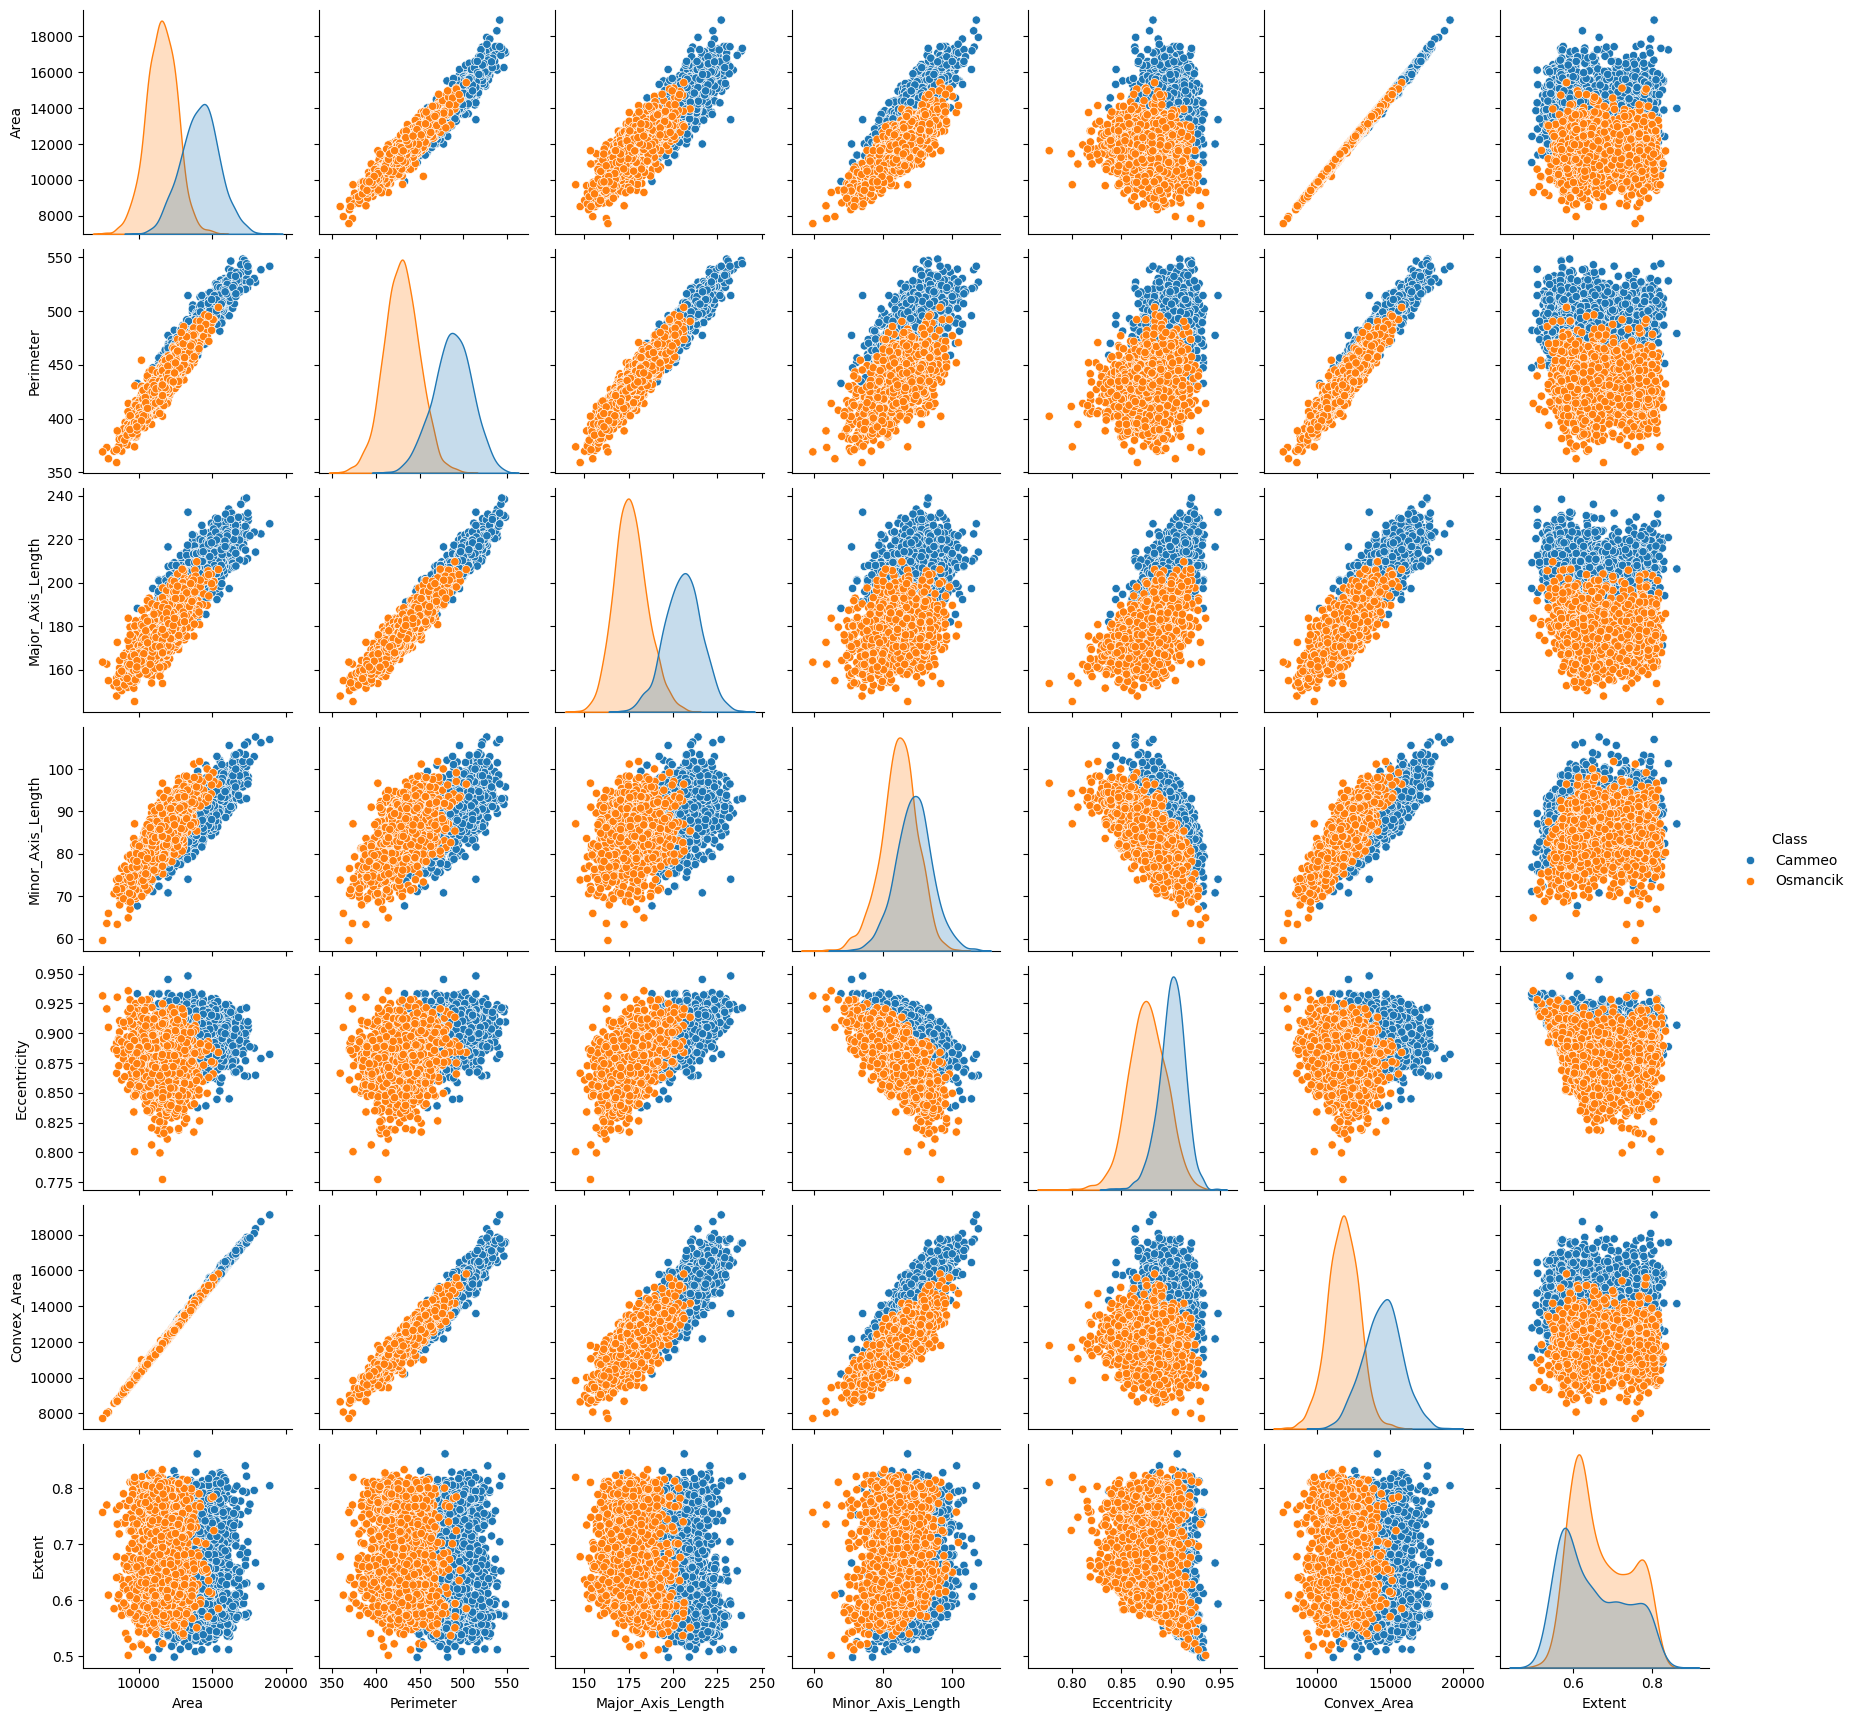

In [47]:
plt.figure(figsize=(15, 10))
sns.pairplot(df, hue="Class")
plt.show()

## Findings:


In [48]:
df["Class_Indices"]=list(map(lambda x: 1 if x[0]=="C" else 0, df["Class"]))

In [49]:
df[["Class", "Class_Indices"]]

,Class,Class_Indices
0,Cammeo,1
1,Cammeo,1
2,Cammeo,1
3,Cammeo,1
4,Cammeo,1
...,...,...
3805,Osmancik,0
3806,Osmancik,0
3807,Osmancik,0
3808,Osmancik,0


In [51]:
correlation= df.drop("Class", axis=1).corr()
correlation

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class_Indices
Area,1.000000,0.966453,0.903015,0.787840,0.352095,0.998939,-0.061184,0.746400
Perimeter,0.966453,1.000000,0.971884,0.629828,0.544601,0.969937,-0.130923,0.806572
Major_Axis_Length,0.903015,0.971884,1.000000,0.452092,0.710897,0.903381,-0.139562,0.827824
Minor_Axis_Length,0.787840,0.629828,0.452092,1.000000,-0.291683,0.787318,0.063366,0.370355
Eccentricity,0.352095,0.544601,0.710897,-0.291683,1.000000,0.352716,-0.198580,0.588916
Convex_Area,0.998939,0.969937,0.903381,0.787318,0.352716,1.000000,-0.065826,0.750424
Extent,-0.061184,-0.130923,-0.139562,0.063366,-0.198580,-0.065826,1.000000,-0.117727
Class_Indices,0.746400,0.806572,0.827824,0.370355,0.588916,0.750424,-0.117727,1.000000


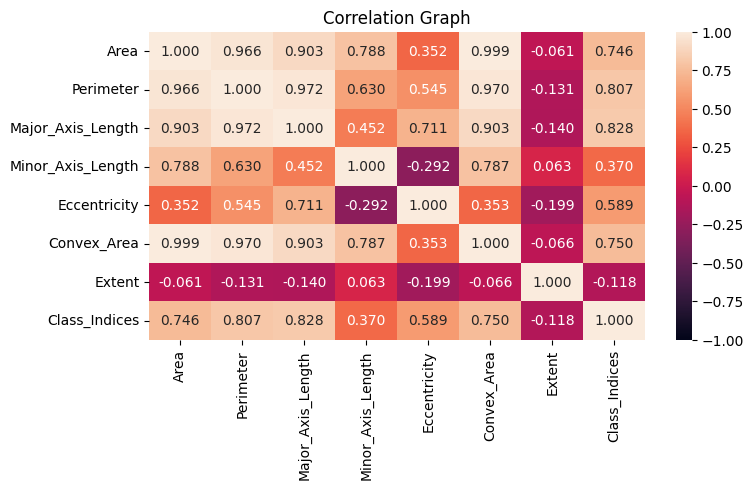

In [54]:
plt.figure(figsize=(8,4))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".3f")
plt.title("Correlation Graph")
plt.show()

In [55]:
df["Class"].value_counts()

Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64

In [56]:
df.sample(5)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class,Class_Indices
3508,11012,428.237000,176.378967,80.697472,0.889198,11325,0.758716,Osmancik,0
1791,11639,432.386993,178.694855,83.954514,0.882762,11940,0.593584,Osmancik,0
3764,11730,429.821991,176.972916,85.217445,0.876431,11900,0.595129,Osmancik,0
2079,14153,480.321991,196.978271,92.798729,0.882074,14555,0.772122,Osmancik,0
290,14573,493.779999,209.355820,89.437508,0.904156,14847,0.650580,Cammeo,1


In [59]:
x=df.drop(["Class", "Class_Indices"], axis=1)
y=df["Class_Indices"]

In [61]:
scaler= StandardScaler() #std scaler only for input data always

In [62]:
std_data= scaler.fit_transform(x)

In [63]:
std_data

array([[ 1.47982953,  2.0043543 ,  2.34854657, ...,  2.01833745,
         1.49965944, -1.15292093],
       [ 1.14787029,  1.12585309,  0.98839042, ...,  0.41001816,
         1.19291767, -0.60207877],
       [ 1.13516924,  1.31721425,  1.45190846, ...,  1.2129565 ,
         1.12650386,  0.405611  ],
       ...,
       [-0.13320373, -0.32985087, -0.29824512, ..., -0.27509915,
        -0.17306812, -0.45573108],
       [-1.60825742, -1.74032002, -1.58097116, ..., -0.59882134,
        -1.60715621, -0.03716757],
       [-0.71225612, -1.39156605, -1.58754648, ..., -2.93916013,
        -0.76628981,  1.82594692]])

In [64]:
std_data[0]

array([ 1.47982953,  2.0043543 ,  2.34854657, -0.21294263,  2.01833745,
        1.49965944, -1.15292093])

In [65]:
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.75, random_state=43)

In [66]:
x_train.shape

(2857, 7)

In [68]:
x_test.shape

(953, 7)

In [69]:
model=LogisticRegression()

In [70]:
model.fit(x_train, y_train)

LogisticRegression()

In [71]:
model.score(x_train, y_train)

0.9317465873293664

In [72]:
y_pred=model.predict(x_test)

In [73]:
accuracy_score(y_test, y_pred)

0.9296956977964324

In [74]:
confusion_matrix(y_test, y_pred)

array([[526,  32],
       [ 35, 360]])

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       558
           1       0.92      0.91      0.91       395

    accuracy                           0.93       953
   macro avg       0.93      0.93      0.93       953
weighted avg       0.93      0.93      0.93       953

